In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create something that looks like a heatmap

In [2]:
#number of points
N = 30

#A and delta arrays
A_arr = np.linspace( -0.6, 0.3, N)
d_arr = np.linspace(-0.1, 0.1, N-1)

def pwr_maker(c0, c1, c2, c3, c4):
    
    x_arr = c0 * (A_arr- c1)**2
    y_arr = c2 * (d_arr - c3)**2
    
    new_arr = x_arr[:,np.newaxis] + y_arr + c4
    
    return new_arr
    
    

A_val = 0.1
d_val = 0.01

A_mag = -30
d_mag = -400
shift = 1.

#wrap all of this values for future reference
real = (A_mag, A_val, d_mag, d_val, shift)


#make power matrix with the equation
#A_mag * (A - A_val)^2 + d_mag * (delta - d_val)^2 + shift = 0 
pwr_tmp = pwr_maker( A_mag, A_val, d_mag, d_val, shift   )

#add a little bit of noise
pwr_tmp += np.random.normal(0.,0.5, pwr_tmp.shape)

Text(0, 0.5, 'delta')

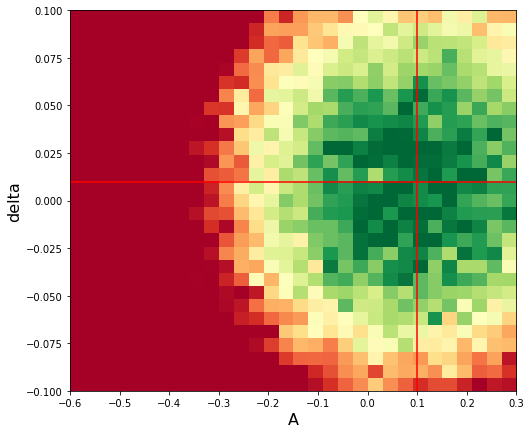

In [3]:
plt.figure(figsize=(8,7))

plt.imshow(pwr_tmp.T, 
            cmap='RdYlGn',
            vmin = -5, vmax = 0.9,
            extent=[A_arr.min(), A_arr.max(), 
                    d_arr.min(), d_arr.max()],
            aspect='auto', origin='lower') 


plt.axvline( x = A_val, c='r')
plt.axhline( y = d_val, c='r')
plt.xlabel('A', fontsize = 16)
plt.ylabel('delta', fontsize = 16)

## Fitting procedure

In [4]:
from scipy.optimize import curve_fit

In [5]:
#make model arrays
A, D = np.meshgrid(A_arr, d_arr)

#get model function
def paraboloid(coords, c0, c1, c2, c3, c4):
    x, y = coords
    return c0 * (x - c1)**2 + c2 * (y - c3)**2 + c4

#ravel meshgrid and data
xdata = A.ravel()
ydata = D.ravel()
zdata = pwr_tmp.T.ravel()

#initial guess
#use maxima for peak location
A_guess, d_guess = np.where( pwr_tmp == np.max(pwr_tmp) )

p0 = [
    -1.0 ,     # c0
    A_arr[ A_guess[0] ],            # c1
    -1.0 ,     # c2
    d_arr[ d_guess[0] ],            # c3
    np.median(pwr_tmp)           # c4
]

#fit params
params, cov = curve_fit(
    paraboloid,
    (xdata, ydata),
    zdata,
    p0=p0
)



In [6]:
for i in range(5):
    print("Real value: ", real[i], f", Fitted value: {params[i]:.4f}")

Real value:  -30 , Fitted value: -30.1901
Real value:  0.1 , Fitted value: 0.0984
Real value:  -400 , Fitted value: -397.0864
Real value:  0.01 , Fitted value: 0.0103
Real value:  1.0 , Fitted value: 1.0115


## Values from the parabola peaks

In [7]:
print("Real value: ", real[1], f", Fitted value: {params[1]:.4f}")
print("Real value: ", real[3], f", Fitted value: {params[3]:.4f}")

Real value:  0.1 , Fitted value: 0.0984
Real value:  0.01 , Fitted value: 0.0103


## Values that would have been inferred from the maximum of the heat map:

In [8]:
print("Real value: ", real[1], ", Value form maximum: ", A_arr[ A_guess[0] ] )
print("Real value: ", real[3], ", Value form maximum: ", d_arr[ d_guess[0] ] )

Real value:  0.1 , Value form maximum:  0.051724137931034475
Real value:  0.01 , Value form maximum:  0.035714285714285726


# Fitting a parabola seems to be better! 